In [2]:

#This is the last file that I have worked on.
# 
#  It produces two subsets : categorical data and numerical data
#The end goal is to eventually clean all of the data from the categorical file and place the newly cleaned attributes into numerical
#With that end case, the categorical dataset will be empty

#Note - we need to learn how to parse the dictionaries:
# ie attributes shear_modulus, bulk_modulus' and 'structure; are the big ones. 
# This step has been a big roadblock for me (I am new to python)


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sci
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report

In [8]:
# df = pd.read_csv('../dataset/real_molecules.csv') #only use with the nontheoreticl dataset

df = pd.read_csv('../dataset/new_theoretical_molecules.csv') #only use with full dataset

/var/folders/xk/fhgbj8qj60n54b05mpfnck0w0000gn/T/ipykernel_1437/3491642242.py:3: DtypeWarning: Columns (23,28,29,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../dataset/new_theoretical_molecules.csv') #only use with full dataset


In [10]:
theoretical = (df['theoretical'] == 1).sum()

print(theoretical)

df.drop(['theoretical', 'deprecated'], axis=1, inplace=True)

105589


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105589 entries, 0 to 105588
Data columns (total 56 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   formula_pretty                                105587 non-null  object 
 1   nsites                                        105589 non-null  int64  
 2   elements                                      105589 non-null  object 
 3   nelements                                     105589 non-null  int64  
 4   composition                                   105589 non-null  object 
 5   composition_reduced                           105589 non-null  object 
 6   formula_anonymous                             105589 non-null  object 
 7   chemsys                                       105589 non-null  object 
 8   volume                                        105589 non-null  float64
 9   density                                       10

In [12]:
'''drop attributes with mostly  missing values (>95% null)'''

drops = ['weighted_surface_energy_EV_PER_ANG2', 'weighted_surface_energy', 
         'weighted_work_function', 'surface_anisotropy', 'shape_factor', 
         'has_reconstructed', 'grain_boundaries', 'e_ij_max', 'n', 'e_ionic', 
         'e_electronic', 'e_total']

df_drops=df[drops]

# df.drop(['weighted_surface_energy_EV_PER_ANG2', 'weighted_surface_energy', 
#          'weighted_work_function', 'surface_anisotropy', 'shape_factor', 
#          'has_reconstructed', 'grain_boundaries', 'e_ij_max', 'n', 'e_ionic', 
#          'e_electronic', 'e_total'], axis=1, inplace=True)

df.drop(columns = drops, axis=1, inplace=True)

df_drops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105589 entries, 0 to 105588
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   weighted_surface_energy_EV_PER_ANG2  29 non-null     float64
 1   weighted_surface_energy              29 non-null     float64
 2   weighted_work_function               29 non-null     float64
 3   surface_anisotropy                   29 non-null     float64
 4   shape_factor                         29 non-null     float64
 5   has_reconstructed                    32 non-null     object 
 6   grain_boundaries                     2 non-null      object 
 7   e_ij_max                             1549 non-null   float64
 8   n                                    2616 non-null   float64
 9   e_ionic                              2616 non-null   float64
 10  e_electronic                         2616 non-null   float64
 11  e_total                   

In [13]:
df['band_gap'].describe()

count    105581.000000
mean          0.893612
std           1.338240
min           0.000000
25%           0.000000
50%           0.018300
75%           1.508700
max          16.586400
Name: band_gap, dtype: float64

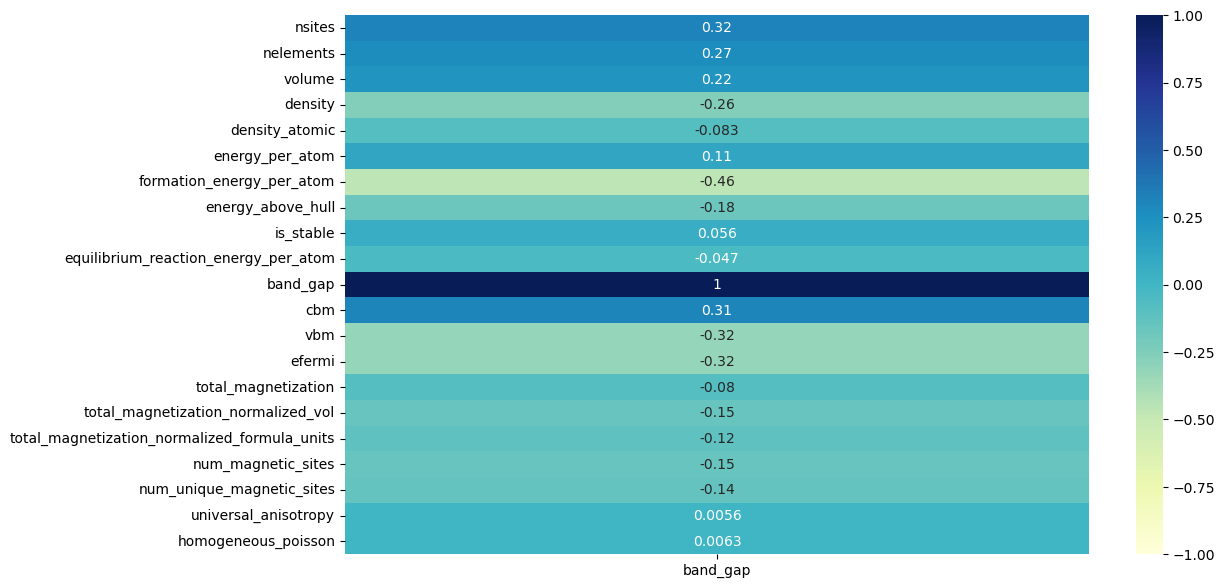

In [14]:
df = df.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

numerical_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 7))
corr_matrix = numerical_df.corr()

corr_band_gap = corr_matrix[['band_gap']]
sns.heatmap(corr_band_gap, annot=True, cmap="YlGnBu", vmin=-1, vmax=1)

plt.show()

In [15]:
categorical_df=df.select_dtypes(include=['object'])
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105589 entries, 0 to 105588
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   formula_pretty             105587 non-null  object
 1   elements                   105589 non-null  object
 2   composition                105589 non-null  object
 3   composition_reduced        105589 non-null  object
 4   formula_anonymous          105589 non-null  object
 5   chemsys                    105589 non-null  object
 6   symmetry                   105589 non-null  object
 7   property_name              105589 non-null  object
 8   material_id                105589 non-null  object
 9   structure                  105589 non-null  object
 10  decomposes_to              92800 non-null   object
 11  xas                        23692 non-null   object
 12  is_gap_direct              105581 non-null  object
 13  is_metal                   105581 non-null  

In [16]:
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_colwidth', 25)
pd.set_option('display.width', 25)

In [17]:
categorical_df.head()

,formula_pretty,elements,composition,composition_reduced,formula_anonymous,chemsys,symmetry,property_name,material_id,structure,decomposes_to,xas,is_gap_direct,is_metal,bandstructure,dos,is_magnetic,ordering,types_of_magnetic_species,bulk_modulus,shear_modulus,possible_species,has_props
0,Si,['Si'],{'Si': 8.0},{'Si': 1.0},A,Si,{'crystal_system': 'T...,summary,mp-676011,{'@module': 'pymatgen...,[{'material_id': 'mp-...,"[{'edge': 'K', 'absor...",False,True,{'setyawan_curtarolo'...,{'total': {'1': {'tas...,False,NM,[],NaN,NaN,[],"{'materials': True, '..."
1,Ti,['Ti'],{'Ti': 100.0},{'Ti': 1.0},A,Ti,{'crystal_system': 'T...,summary,mp-1244924,{'@module': 'pymatgen...,[{'material_id': 'mp-...,NaN,False,True,NaN,NaN,False,NM,[],NaN,NaN,[],"{'materials': True, '..."
2,C,['C'],{'C': 100.0},{'C': 1.0},A,C,{'crystal_system': 'T...,summary,mp-1244964,{'@module': 'pymatgen...,[{'material_id': 'mp-...,NaN,False,False,NaN,NaN,True,FM,['C'],NaN,NaN,[],"{'materials': True, '..."
3,Zn,['Zn'],{'Zn': 100.0},{'Zn': 1.0},A,Zn,{'crystal_system': 'T...,summary,mp-1245266,{'@module': 'pymatgen...,[{'material_id': 'mp-...,NaN,False,True,NaN,NaN,False,NM,[],NaN,NaN,[],"{'materials': True, '..."
4,Si,['Si'],{'Si': 100.0},{'Si': 1.0},A,Si,{'crystal_system': 'T...,summary,mp-1244971,{'@module': 'pymatgen...,[{'material_id': 'mp-...,NaN,False,False,NaN,NaN,False,NM,[],NaN,NaN,[],"{'materials': True, '..."


In [18]:
categorical_df.drop(['elements','composition','composition_reduced','formula_anonymous',
                     'chemsys','property_name','types_of_magnetic_species','possible_species',
                     'types_of_magnetic_species','material_id'
                     ], inplace=True, axis=1)

categorical_df.head()

,formula_pretty,symmetry,structure,decomposes_to,xas,is_gap_direct,is_metal,bandstructure,dos,is_magnetic,ordering,bulk_modulus,shear_modulus,has_props
0,Si,{'crystal_system': 'T...,{'@module': 'pymatgen...,[{'material_id': 'mp-...,"[{'edge': 'K', 'absor...",False,True,{'setyawan_curtarolo'...,{'total': {'1': {'tas...,False,NM,NaN,NaN,"{'materials': True, '..."
1,Ti,{'crystal_system': 'T...,{'@module': 'pymatgen...,[{'material_id': 'mp-...,NaN,False,True,NaN,NaN,False,NM,NaN,NaN,"{'materials': True, '..."
2,C,{'crystal_system': 'T...,{'@module': 'pymatgen...,[{'material_id': 'mp-...,NaN,False,False,NaN,NaN,True,FM,NaN,NaN,"{'materials': True, '..."
3,Zn,{'crystal_system': 'T...,{'@module': 'pymatgen...,[{'material_id': 'mp-...,NaN,False,True,NaN,NaN,False,NM,NaN,NaN,"{'materials': True, '..."
4,Si,{'crystal_system': 'T...,{'@module': 'pymatgen...,[{'material_id': 'mp-...,NaN,False,False,NaN,NaN,False,NM,NaN,NaN,"{'materials': True, '..."


In [19]:
#get null count for magnetic

print(categorical_df['is_magnetic'].isna().sum())



790


In [20]:
#fill nan with 0 (false) values
categorical_df['is_magnetic'] = categorical_df['is_magnetic'].fillna(False)

categorical_df['is_magnetic'] = categorical_df['is_magnetic'].astype(int)

numerical_df.add(categorical_df['is_magnetic'], axis=0)
categorical_df.drop(['is_magnetic'], axis=1, inplace=True)

categorical_df.info()

/var/folders/xk/fhgbj8qj60n54b05mpfnck0w0000gn/T/ipykernel_1437/2365508944.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  categorical_df['is_magnetic'] = categorical_df['is_magnetic'].fillna(False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105589 entries, 0 to 105588
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   formula_pretty  105587 non-null  object
 1   symmetry        105589 non-null  object
 2   structure       105589 non-null  object
 3   decomposes_to   92800 non-null   object
 4   xas             23692 non-null   object
 5   is_gap_direct   105581 non-null  object
 6   is_metal        105581 non-null  object
 7   bandstructure   36421 non-null   object
 8   dos             49763 non-null   object
 9   ordering        104799 non-null  object
 10  bulk_modulus    4830 non-null    object
 11  shear_modulus   4830 non-null    object
 12  has_props       105589 non-null  object
dtypes: object(13)
memory usage: 10.5+ MB


In [21]:
# pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_colwidth', 500)
# pd.set_option('display.width', 25)

print(categorical_df['has_props'])

pd.set_option('display.max_rows', 25)
pd.set_option('display.max_colwidth', 25)


0              {'materials': True, 'thermo': True, 'xas': True, 'grain_boundaries': False, 'chemenv': True, 'electronic_structure': True, 'absorption': False, 'bandstructure': True, 'dos': True, 'magnetism': True, 'elasticity': False, 'dielectric': False, 'piezoelectric': False, 'surface_properties': False, 'oxi_states': True, 'provenance': True, 'charge_density': True, 'eos': False, 'phonon': False, 'insertion_electrodes': False, 'substrates': True}
1         {'materials': True, 'thermo': True, 'xas': False, 'grain_boundaries': False, 'chemenv': True, 'electronic_structure': True, 'absorption': False, 'bandstructure': False, 'dos': False, 'magnetism': True, 'elasticity': False, 'dielectric': False, 'piezoelectric': False, 'surface_properties': False, 'oxi_states': True, 'provenance': True, 'charge_density': False, 'eos': False, 'phonon': False, 'insertion_electrodes': False, 'substrates': False}
                                                                                          

In [22]:
categorical_df['has_props'] = categorical_df['has_props'].apply(eval)  
# Use eval to convert strings to dictionaries

# Expand the 'has_props' column into individual columns
has_props_bools = pd.json_normalize(categorical_df['has_props'])

numerical_df = pd.concat([numerical_df, has_props_bools], axis=1)
categorical_df = categorical_df.drop(columns=['has_props'])
numerical_df[numerical_df.select_dtypes(include=['bool']).columns] = numerical_df.select_dtypes(include=['bool']).astype(int)

numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105589 entries, 0 to 105588
Data columns (total 42 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   nsites                                        105589 non-null  int64  
 1   nelements                                     105589 non-null  int64  
 2   volume                                        105589 non-null  float64
 3   density                                       105589 non-null  float64
 4   density_atomic                                105589 non-null  float64
 5   energy_per_atom                               103475 non-null  float64
 6   formation_energy_per_atom                     103475 non-null  float64
 7   energy_above_hull                             103475 non-null  float64
 8   is_stable                                     105589 non-null  int64  
 9   equilibrium_reaction_energy_per_atom          10

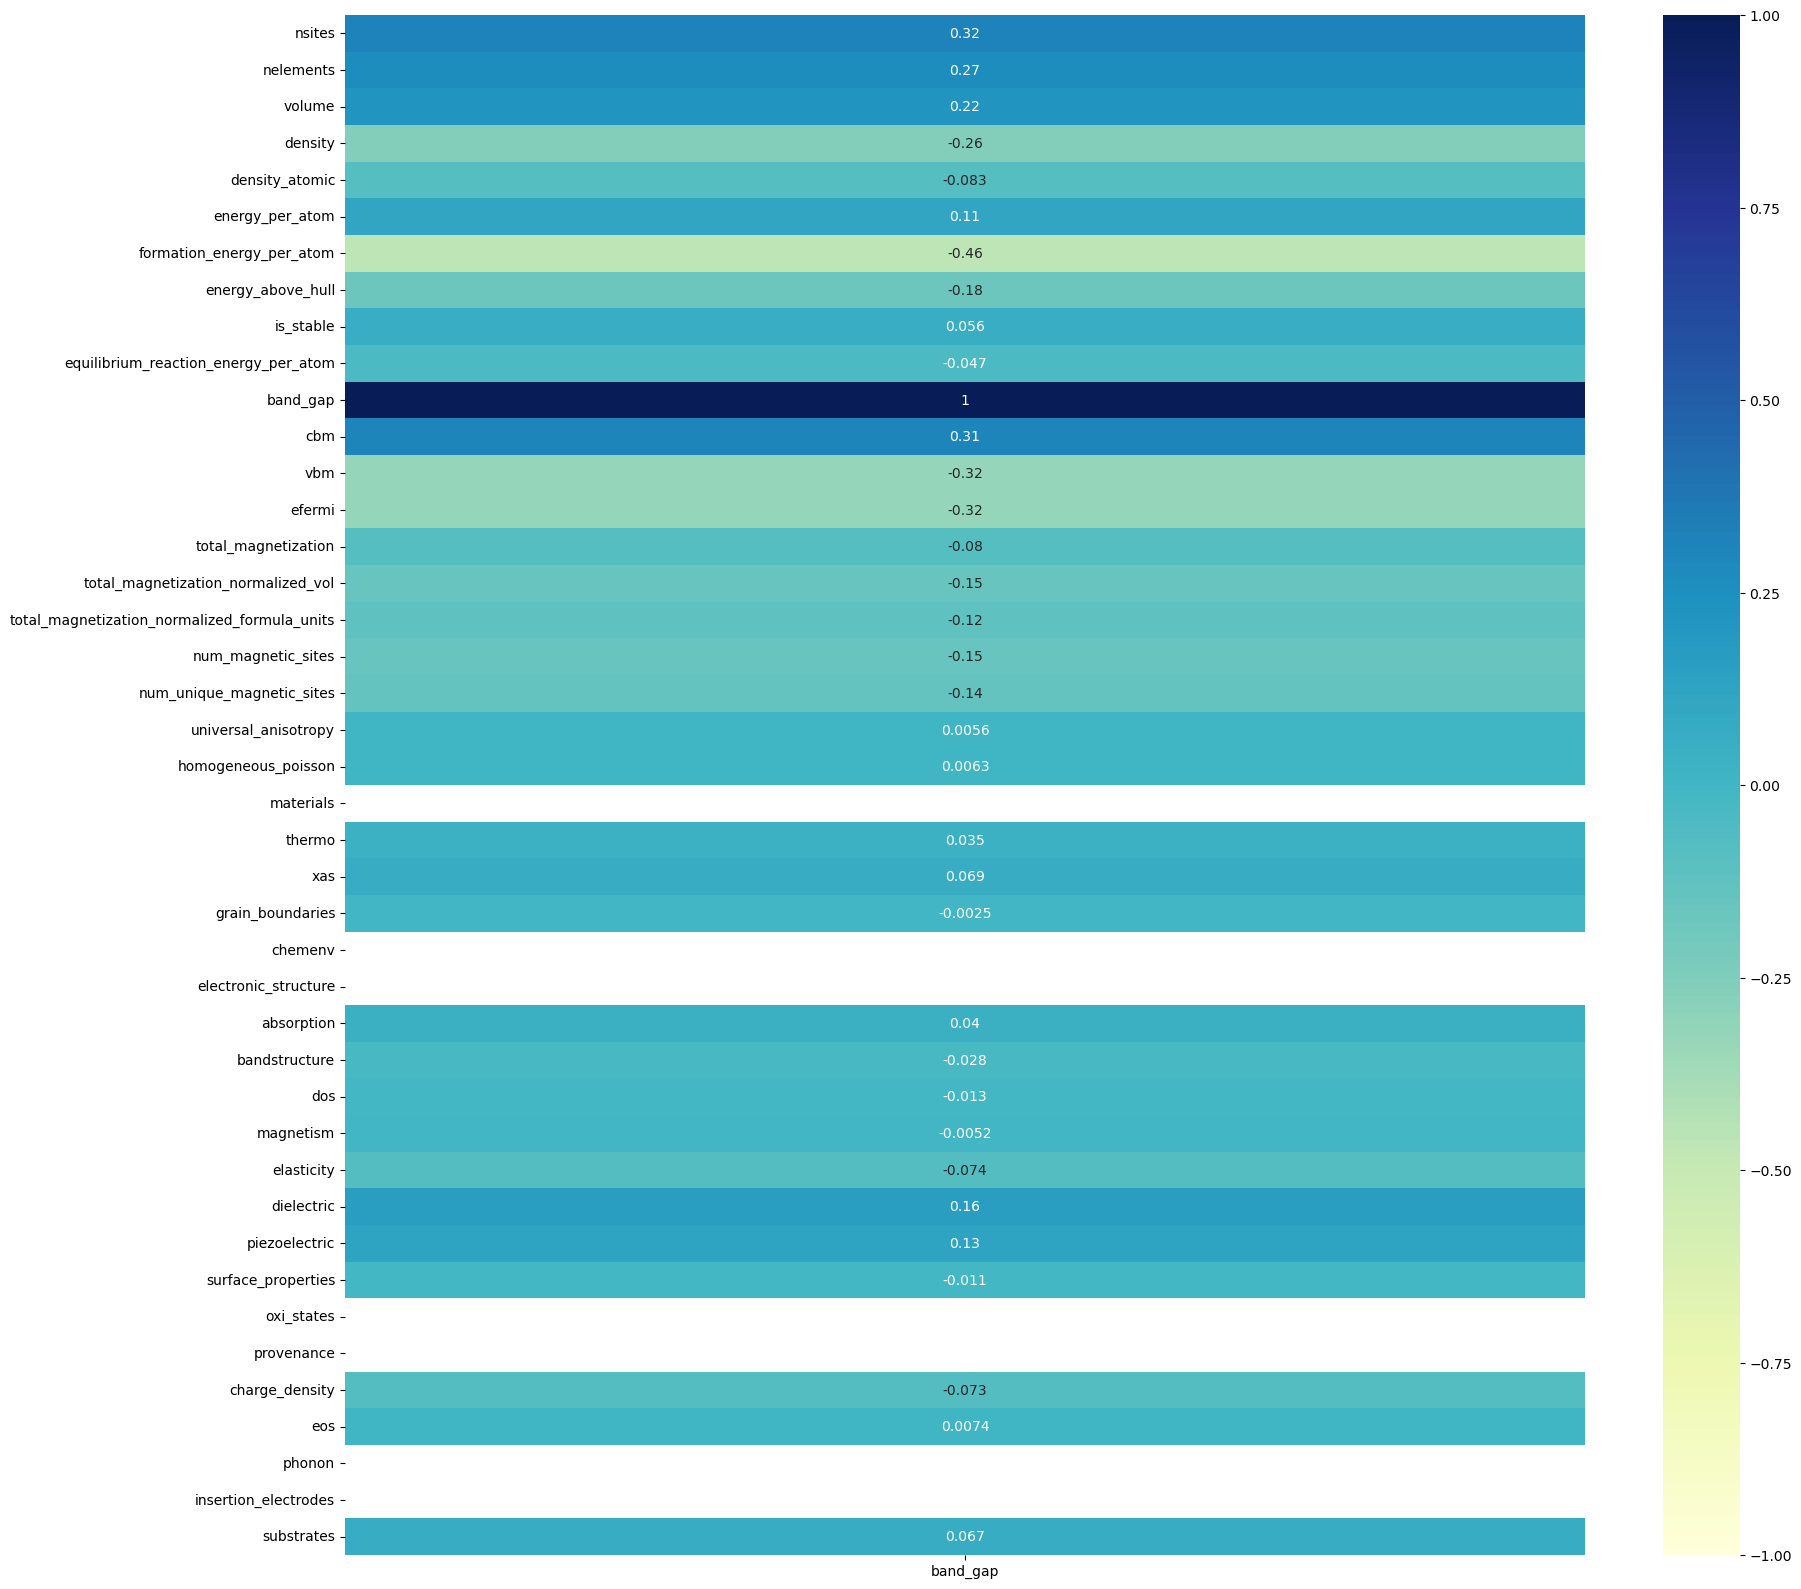

In [23]:
plt.figure(figsize=(20, 20))
corr_matrix = numerical_df.corr()

corr_band_gap = corr_matrix[['band_gap']]
sns.heatmap(corr_band_gap, annot=True, cmap="YlGnBu", vmin=-1, vmax=1)

plt.show()

In [24]:
print((numerical_df['chemenv'] == 0).sum(), (numerical_df['chemenv'] == 1).sum())
print((numerical_df['materials'] == 0).sum(), (numerical_df['materials'] == 1).sum())
print((numerical_df['electronic_structure'] == 0).sum(),  (numerical_df['electronic_structure'] == 1).sum())
print((numerical_df['oxi_states'] == 0).sum(),  (numerical_df['oxi_states'] == 1).sum())
print((numerical_df['provenance'] == 0).sum(),  (numerical_df['provenance'] == 1).sum())
print((numerical_df['phonon'] == 0).sum(),  (numerical_df['phonon'] == 1).sum())
print((numerical_df['insertion_electrodes'] == 0).sum(),  (numerical_df['insertion_electrodes'] == 1).sum())

8 105581
0 105589
8 105581
8 105581
8 105581
105589 0
105589 0


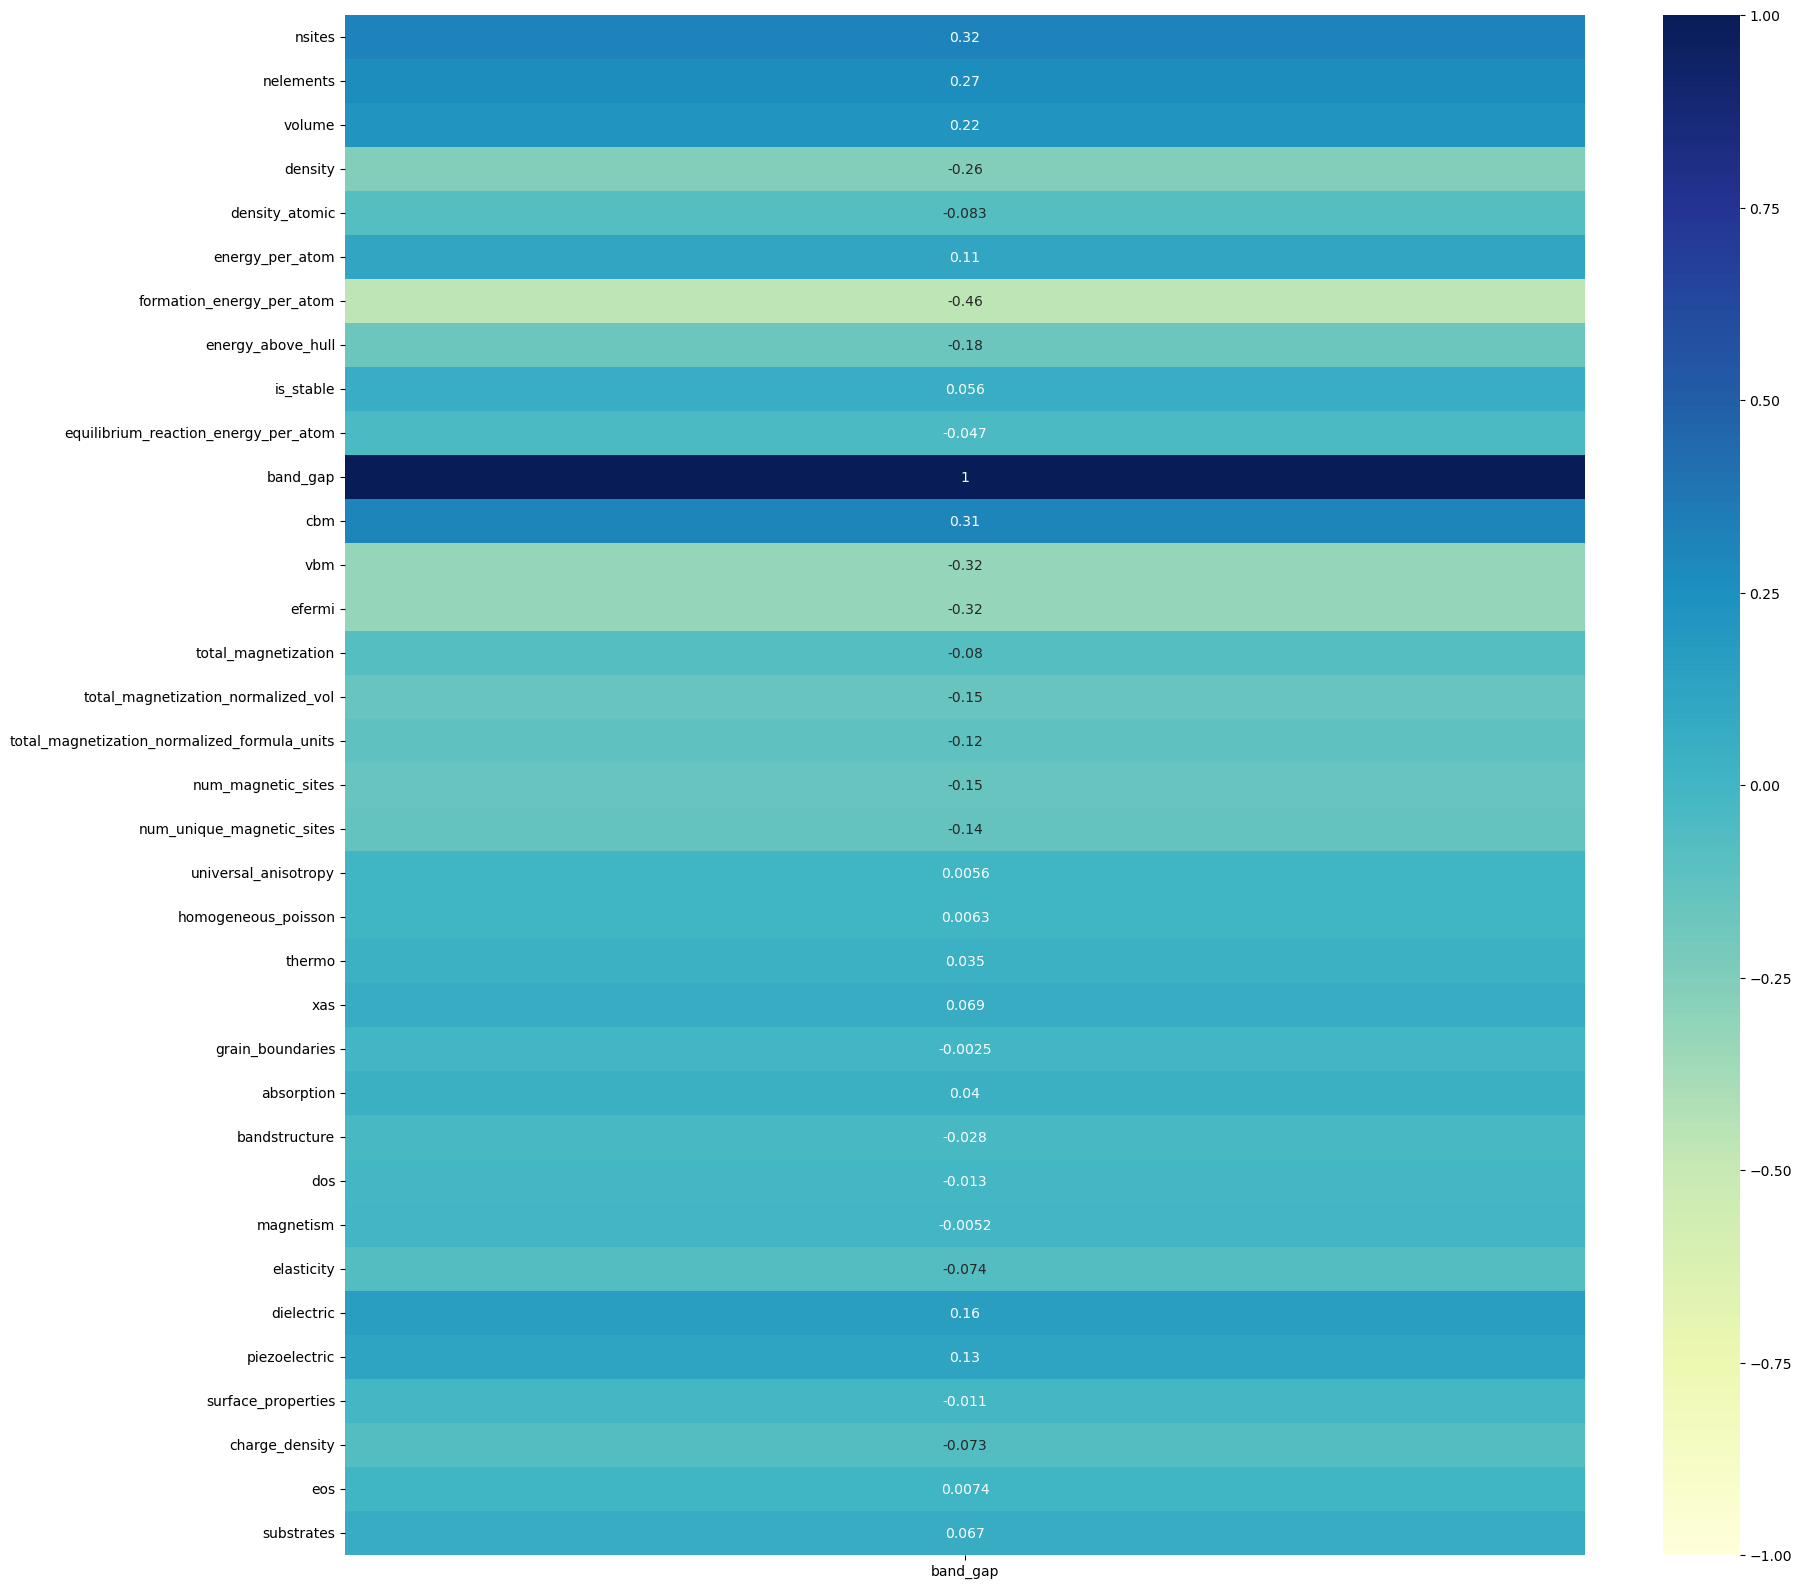

In [25]:
#These values provide no insight - either all 1 or 0 - drop them all
numerical_df.drop(['chemenv', 'materials', 'electronic_structure', 'oxi_states', 'provenance', 'phonon', 'insertion_electrodes'], inplace=True, axis=1)

plt.figure(figsize=(20, 20))
corr_matrix = numerical_df.corr()

corr_band_gap = corr_matrix[['band_gap']]
sns.heatmap(corr_band_gap, annot=True, cmap="YlGnBu", vmin=-1, vmax=1)

plt.show()

In [26]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105589 entries, 0 to 105588
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   formula_pretty  105587 non-null  object
 1   symmetry        105589 non-null  object
 2   structure       105589 non-null  object
 3   decomposes_to   92800 non-null   object
 4   xas             23692 non-null   object
 5   is_gap_direct   105581 non-null  object
 6   is_metal        105581 non-null  object
 7   bandstructure   36421 non-null   object
 8   dos             49763 non-null   object
 9   ordering        104799 non-null  object
 10  bulk_modulus    4830 non-null    object
 11  shear_modulus   4830 non-null    object
dtypes: object(12)
memory usage: 9.7+ MB


In [27]:
# print(categorical_df[categorical_df['shear_modulus'].notna()])

# categorical_df['shear_modulus'] = categorical_df['shear_modulus'].apply(eval)  
# Use eval to convert strings to dictionaries

# Expand the 'shear_modulus' column into individual columns
# shear_modulus_bools = pd.json_normalize(categorical_df['shear_modulus'])

# shear_modulus_bools.head()

# numerical_df = pd.concat([numerical_df, has_props_bools], axis=1)

# categorical_df = categorical_df.drop(columns=['shear_modulus'])
# numerical_df[numerical_df.select_dtypes(include=['bool']).columns] = numerical_df.select_dtypes(include=['bool']).astype(int)


categorical_df.drop(['shear_modulus'], inplace= True, axis=1)
categorical_df.head()

,formula_pretty,symmetry,structure,decomposes_to,xas,is_gap_direct,is_metal,bandstructure,dos,ordering,bulk_modulus
0,Si,{'crystal_system': 'T...,{'@module': 'pymatgen...,[{'material_id': 'mp-...,"[{'edge': 'K', 'absor...",False,True,{'setyawan_curtarolo'...,{'total': {'1': {'tas...,NM,NaN
1,Ti,{'crystal_system': 'T...,{'@module': 'pymatgen...,[{'material_id': 'mp-...,NaN,False,True,NaN,NaN,NM,NaN
2,C,{'crystal_system': 'T...,{'@module': 'pymatgen...,[{'material_id': 'mp-...,NaN,False,False,NaN,NaN,FM,NaN
3,Zn,{'crystal_system': 'T...,{'@module': 'pymatgen...,[{'material_id': 'mp-...,NaN,False,True,NaN,NaN,NM,NaN
4,Si,{'crystal_system': 'T...,{'@module': 'pymatgen...,[{'material_id': 'mp-...,NaN,False,False,NaN,NaN,NM,NaN


In [28]:
categorical_df.shape

(105589, 11)

In [29]:
print(type(categorical_df['symmetry'].iloc[0]))

<class 'str'>


In [30]:
# df.to_csv('../dataset/5_low_frequencies_removed.csv', index=False)

numerical_df.to_csv('../dataset/theoretical_numerical_data.csv', index=False)
categorical_df.to_csv('../dataset/theoretical_categorical_data.csv', index=False)
